## About the dataset
- We're looking at airline satisfaction scores for 129,880 passengers
- Each record represents one passenger
- Records contain details about passenger demographics, flight distance and delays, travel class and purpose, and ratings for factors like cleanliness, comfort, and service, as well as overall satisfaction with the airline

## Data Dictionary

- ID, Unique passenger identifier
- Gender, Gender of the passenger (Female/Male)
- Age, Age of the passenger
- Customer Type, Type of airline customer (First-time/Returning)
- Type of Travel, Purpose of the flight (Business/Personal)
- Class, Travel class in the airplane for the passenger seat
- Flight Distance, Flight distance in miles
- Departure Delay, Flight departure delay in minutes
- Arrival Delay, Flight arrival delay in minutes
- Departure and Arrival Time Convenience,"Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest)
- Online Boarding, "Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) 
Gate Location, "Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) 
- On-board Service, "Satisfaction level with the on-boarding service in the airport from 1 (lowest) to 5 (highest) 
- Seat Comfort, "Satisfaction level with the comfort of the airplane seat from 1 (lowest) to 5 (highest) 
- Leg Room Service, "Satisfaction level with the leg room of the airplane seat from 1 (lowest) to 5 (highest) 
- Cleanliness, "Satisfaction level with the cleanliness of the airplane from 1 (lowest) to 5 (highest) 
- Food and Drink, "Satisfaction level with the food and drinks on the airplane from 1 (lowest) to 5 (highest) 
- In-flight Service, "Satisfaction level with the in-flight service from 1 (lowest) to 5 (highest)
- In-flight Wifi Service, "Satisfaction level with the in-flight Wifi service from 1 (lowest) to 5 (highest) 
- In-flight Entertainment, "Satisfaction level with the in-flight entertainment from 1 (lowest) to 5 (highest) 
- Baggage Handling, "Satisfaction level with the baggage handling from the airline from 1 (lowest) to 5 (highest)
- Satisfaction, Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied)


## Task

Your task is to recommend a data-driven strategy for increasing Maven Airlines' satisfaction rate, and present it in the form of a single page report or dashboard.

# EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = './Data/airline_passenger_satisfaction.csv'

df = pd.read_csv(path)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

Only column with null value is Arrival Delay, fill by mean or median can be used.

In [ ]:
col = df.columns.tolist()
col

['ID',
 'Gender',
 'Age',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Satisfaction']

In [ ]:
# number of unique values in each column
for i in col:
  n_uni = df[i].nunique()
  print(f"{i} : {n_uni}")

ID : 129880
Gender : 2
Age : 75
Customer Type : 2
Type of Travel : 2
Class : 3
Flight Distance : 3821
Departure Delay : 466
Arrival Delay : 472
Departure and Arrival Time Convenience : 6
Ease of Online Booking : 6
Check-in Service : 6
Online Boarding : 6
Gate Location : 6
On-board Service : 6
Seat Comfort : 6
Leg Room Service : 6
Cleanliness : 6
Food and Drink : 6
In-flight Service : 6
In-flight Wifi Service : 6
In-flight Entertainment : 6
Baggage Handling : 5
Satisfaction : 2


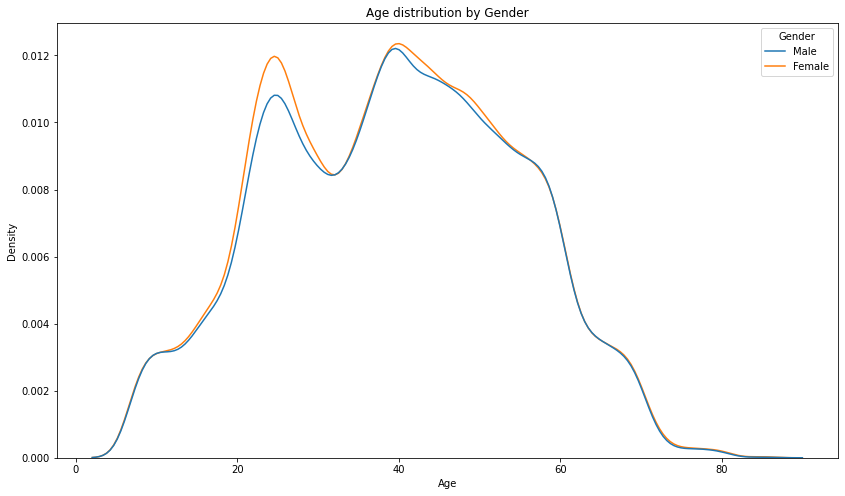

In [ ]:
# age distribution

plt.figure(figsize=(14,8))
sns.kdeplot(data= df, x='Age',hue='Gender')
plt.title('Age distribution by Gender')
plt.show()

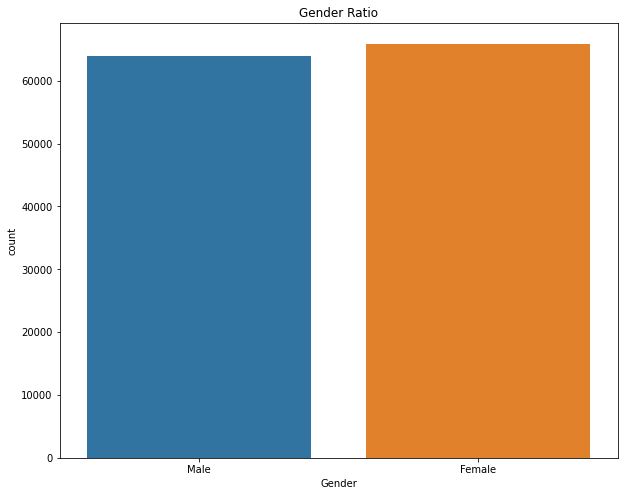

In [ ]:
# Gender ratio

plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Gender')
plt.title('Gender Ratio')
plt.show()

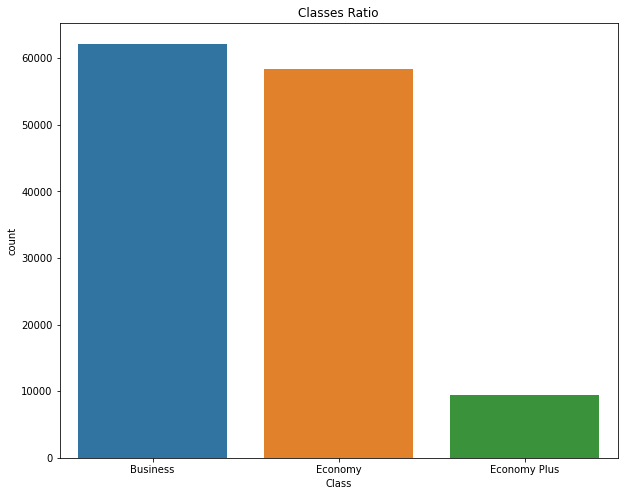

In [ ]:
# Classes ratio

plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Class')
plt.title('Classes Ratio')
plt.show()

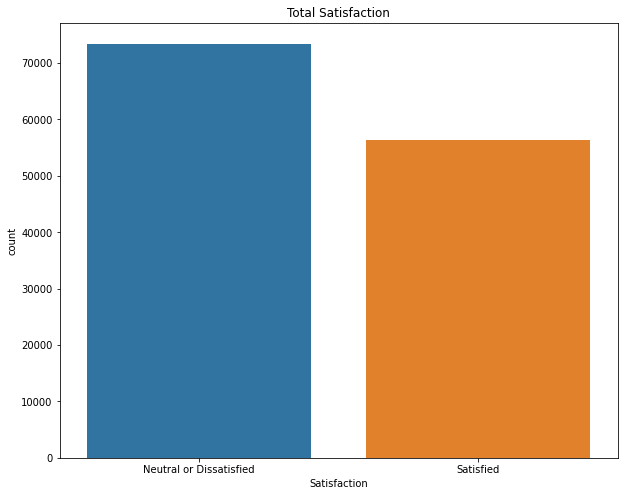

In [ ]:
# Ratio of Total Satisfaction

plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Satisfaction')
plt.title('Total Satisfaction')
plt.show()

In [ ]:
satis = df[df['Satisfaction'] == 'Satisfied'].count()
print(f'Percentage of Satisfied Customers : {round(int(satis[0])/len(df)*100,2)}%')

Percentage of Satisfied Customers : 43.45%


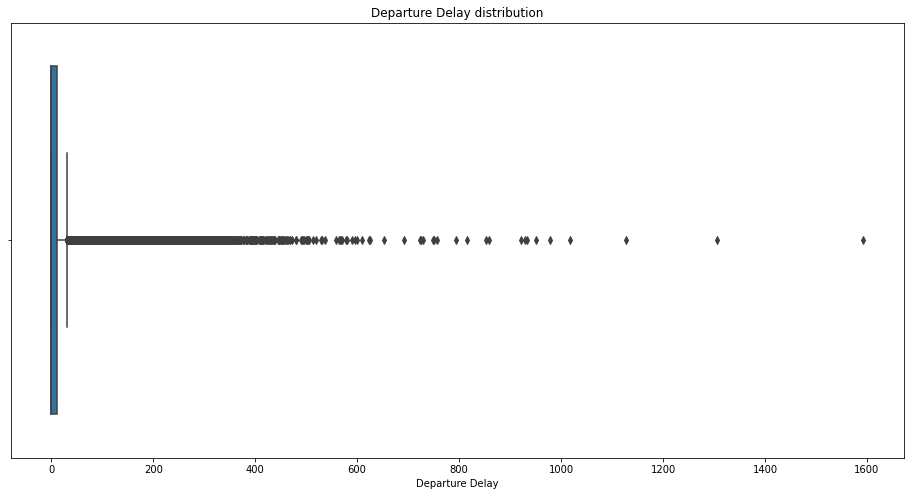

In [ ]:
# Delay time distribution

plt.figure(figsize=(16,8))
sns.boxplot(data= df, x= 'Departure Delay')
plt.title('Departure Delay distribution')
plt.show()

In [ ]:
# mean and median time of Departure Delay
depart_mean = df['Departure Delay'].mean()
depart_median = df['Departure Delay'].median()
print(f'Departure Delay mean is: {depart_mean} (mins)')
print(f'Departure Delay median is: {depart_median} (mins)')

Departure Delay mean is: 14.713712657838004 (mins)
Departure Delay median is: 0.0 (mins)


In [ ]:
df['Departure Delay'].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay, dtype: float64

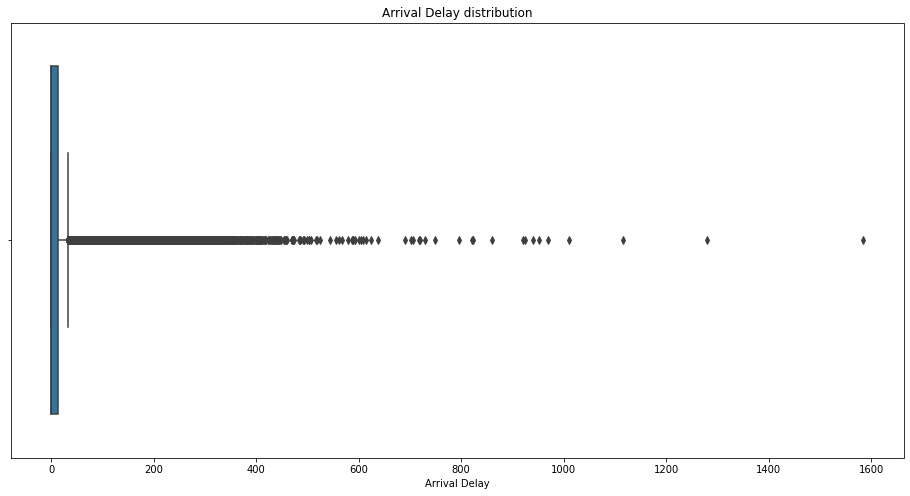

In [ ]:
# Delay time distribution

plt.figure(figsize=(16,8))
sns.boxplot(data= df, x= 'Arrival Delay')
plt.title('Arrival Delay distribution')
plt.show()

In [ ]:
# mean and median time of Departure Delay

arr_mean = df['Arrival Delay'].mean()
arr_median = df['Arrival Delay'].median()
print(f'Arrival Delay mean is: {arr_mean} (mins)')
print(f'Arrival Delay median is: {arr_median} (mins)')

Arrival Delay mean is: 15.09112883918849 (mins)
Arrival Delay median is: 0.0 (mins)


In [ ]:
df['Arrival Delay'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64

In [ ]:
df['Satisfaction'].value_counts(normalize=True) * 100

Neutral or Dissatisfied    56.553742
Satisfied                  43.446258
Name: Satisfaction, dtype: float64

In [ ]:
# average satisfaction score

scores = ['Departure and Arrival Time Convenience',
         'Ease of Online Booking',
         'Check-in Service',
         'Online Boarding',
         'Gate Location','On-board Service',
         'Seat Comfort','Leg Room Service',
         'Cleanliness','Food and Drink',
         'In-flight Service','In-flight Wifi Service',
         'In-flight Entertainment', 'Baggage Handling'  ]

avg_score = {}
for score in scores:
  print(f'Average score of {score} is : {df[score].mean()}')
  avg_score[score] = df[score].mean()

Average score of Departure and Arrival Time Convenience is : 3.0575993224514937
Average score of Ease of Online Booking is : 2.7568755774561136
Average score of Check-in Service is : 3.3062673236834
Average score of Online Boarding is : 3.252633199876809
Average score of Gate Location is : 2.976924853711118
Average score of On-board Service is : 3.3830227902679395
Average score of Seat Comfort is : 3.4413612565445026
Average score of Leg Room Service is : 3.3508777332922697
Average score of Cleanliness is : 3.286325839236218
Average score of Food and Drink is : 3.2047736372035724
Average score of In-flight Service is : 3.6421927933477054
Average score of In-flight Wifi Service is : 2.7286957191253465
Average score of In-flight Entertainment is : 3.358076686171851
Average score of Baggage Handling is : 3.632114259316292


In [ ]:
avg_score

{'Baggage Handling': 3.632114259316292,
 'Check-in Service': 3.3062673236834,
 'Cleanliness': 3.286325839236218,
 'Departure and Arrival Time Convenience': 3.0575993224514937,
 'Ease of Online Booking': 2.7568755774561136,
 'Food and Drink': 3.2047736372035724,
 'Gate Location': 2.976924853711118,
 'In-flight Entertainment': 3.358076686171851,
 'In-flight Service': 3.6421927933477054,
 'In-flight Wifi Service': 2.7286957191253465,
 'Leg Room Service': 3.3508777332922697,
 'On-board Service': 3.3830227902679395,
 'Online Boarding': 3.252633199876809,
 'Seat Comfort': 3.4413612565445026}

In [ ]:
# sort the dict
avg_score = sorted(avg_score.items(), key=lambda x: x[1], reverse=True)
avg_score

[('In-flight Service', 3.6421927933477054),
 ('Baggage Handling', 3.632114259316292),
 ('Seat Comfort', 3.4413612565445026),
 ('On-board Service', 3.3830227902679395),
 ('In-flight Entertainment', 3.358076686171851),
 ('Leg Room Service', 3.3508777332922697),
 ('Check-in Service', 3.3062673236834),
 ('Cleanliness', 3.286325839236218),
 ('Online Boarding', 3.252633199876809),
 ('Food and Drink', 3.2047736372035724),
 ('Departure and Arrival Time Convenience', 3.0575993224514937),
 ('Gate Location', 2.976924853711118),
 ('Ease of Online Booking', 2.7568755774561136),
 ('In-flight Wifi Service', 2.7286957191253465)]

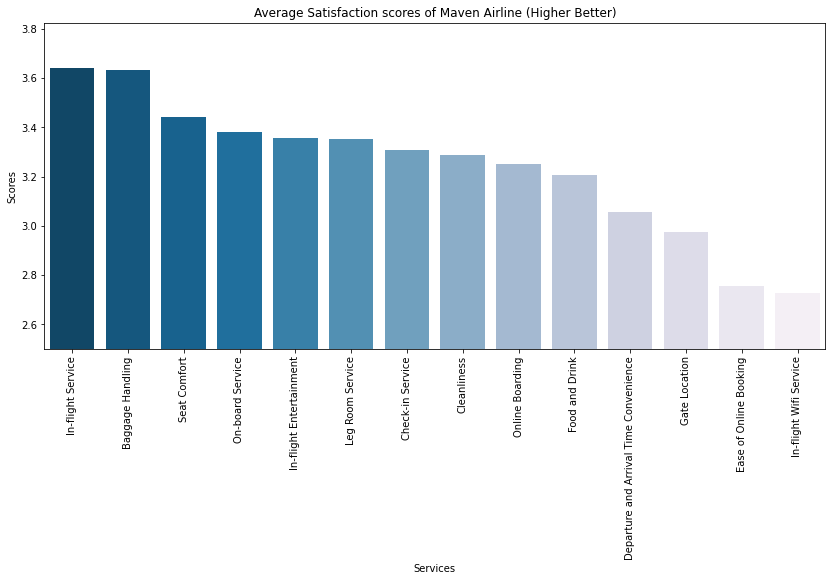

In [ ]:
temp_df = pd.DataFrame(avg_score, columns =['Services', 'Scores'])
plt.figure(figsize=(14,6))
sns.barplot(data=temp_df, x='Services', y='Scores',palette = 'PuBu_r')
plt.xticks(rotation=90)
plt.ylim(2.5)
plt.title('Average Satisfaction scores of Maven Airline (Higher Better)')
plt.show()

In [ ]:
temp_df

,Services,Scores
0,In-flight Service,3.642193
1,Baggage Handling,3.632114
2,Seat Comfort,3.441361
3,On-board Service,3.383023
4,In-flight Entertainment,3.358077
5,Leg Room Service,3.350878
6,Check-in Service,3.306267
7,Cleanliness,3.286326
8,Online Boarding,3.252633
9,Food and Drink,3.204774


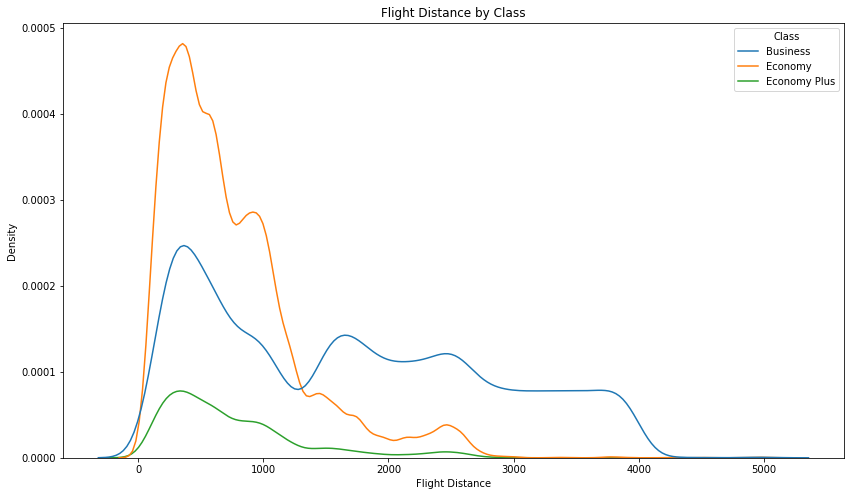

In [ ]:
# distribution of flight distance by class

plt.figure(figsize=(14,8))
sns.kdeplot(data= df, x='Flight Distance',hue='Class')
plt.title('Flight Distance by Class')
plt.show()

For long distance flight (over 3000 miles) almost all passengers are in Business class

In [ ]:
# calculate overall Satifaction Score for each customer

df['Over All Satisfaction'] = df[scores].sum(axis=1)/len(scores)
df['Over All Satisfaction'].head()

0    3.857143
1    3.785714
2    3.928571
3    3.785714
4    3.500000
Name: Over All Satisfaction, dtype: float64

In [ ]:
# if else condition for age group

conditions = [
             (df['Age'] < 20),
             (df['Age'] >=20) & (df['Age']< 30),
             (df['Age'] >= 30) & (df['Age'] < 40),
             (df['Age'] >= 40) & (df['Age']< 50),
             (df['Age'] >= 50)
]
age_groups = ['<20','20-30','30-40','40-50','>50']
df['Age_group'] = np.select(conditions, age_groups)
df['Age_group'].head(10)

0    40-50
1    30-40
2    40-50
3      >50
4    40-50
5    40-50
6    40-50
7      >50
8      >50
9    30-40
Name: Age_group, dtype: object

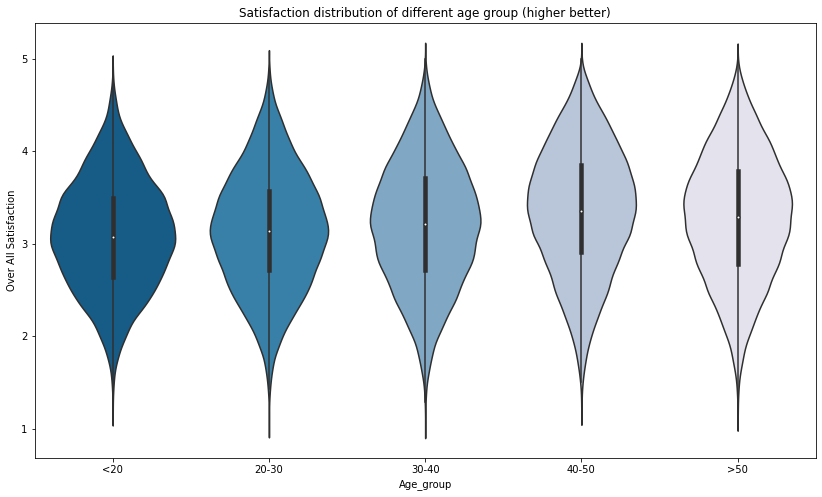

In [ ]:

plt.figure(figsize=(14,8))
sns.violinplot(data= df, x='Age_group',y='Over All Satisfaction', order=age_groups,palette = 'PuBu_r')
plt.title('Satisfaction distribution of different age group (higher better)')
plt.show()

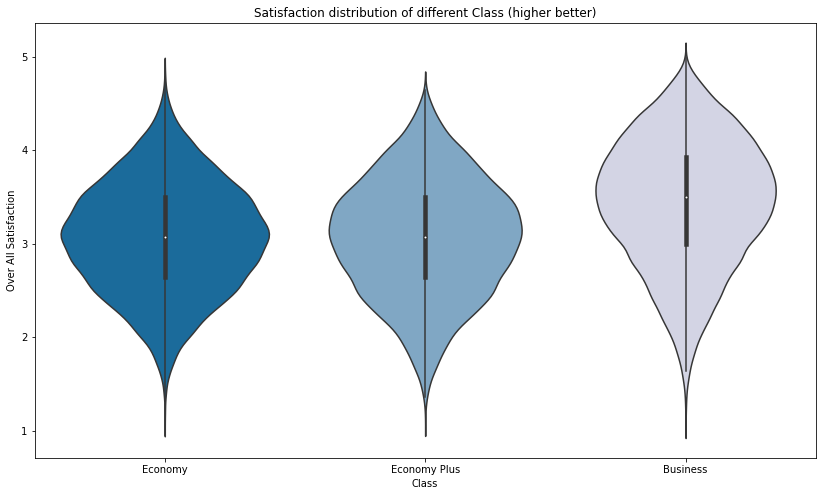

In [ ]:
plt.figure(figsize=(14,8))
sns.violinplot(data= df, x='Class',y='Over All Satisfaction',order = ['Economy','Economy Plus','Business'],palette = 'PuBu_r')
plt.title('Satisfaction distribution of different Class (higher better)')
plt.show()

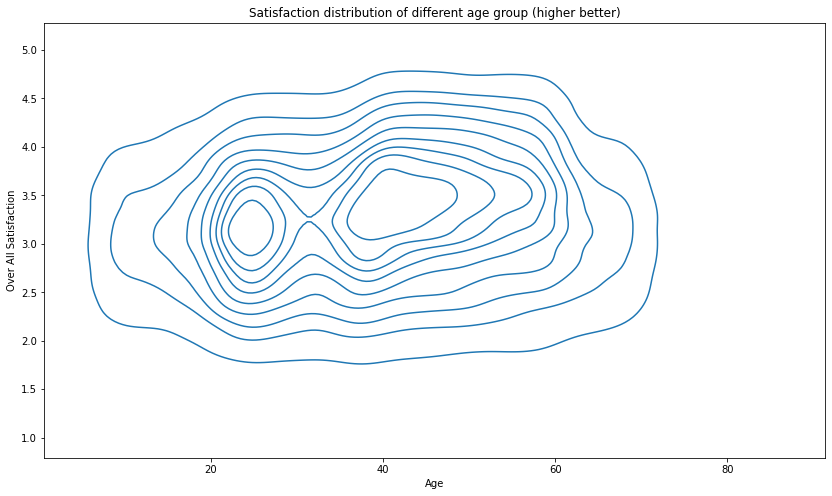

In [ ]:
plt.figure(figsize=(14,8))
sns.kdeplot(data= df, x='Age',y='Over All Satisfaction')
plt.title('Satisfaction distribution of different age group (higher better)')
plt.show()

In [ ]:
df.groupby('Customer Type')['Over All Satisfaction'].mean()

Customer Type
First-time    3.053755
Returning     3.283294
Name: Over All Satisfaction, dtype: float64

In [ ]:
df.groupby('Customer Type')['Departure and Arrival Time Convenience'].mean()

Customer Type
First-time    2.390454
Returning     3.207125
Name: Departure and Arrival Time Convenience, dtype: float64

In [ ]:
# average satisfaction score for types of customer

scores = ['Departure and Arrival Time Convenience',
         'Ease of Online Booking',
         'Check-in Service',
         'Online Boarding',
         'Gate Location','On-board Service',
         'Seat Comfort','Leg Room Service',
         'Cleanliness','Food and Drink',
         'In-flight Service','In-flight Wifi Service',
         'In-flight Entertainment', 'Baggage Handling'  ]

avg_score_types = {}

for score in scores:
  #print(f'Average score of {score} is : {df.groupby('Customer Type')[score].mean()}')
  avg_score_types[score] = df.groupby('Customer Type')[score].mean().tolist()

In [ ]:
avg_score_types

{'Baggage Handling': [3.694112699747687, 3.618218661639962],
 'Check-in Service': [3.2227081581160637, 3.324995287464656],
 'Cleanliness': [3.0607232968881415, 3.33688972667295],
 'Departure and Arrival Time Convenience': [2.390454163162321,
  3.207125353440151],
 'Ease of Online Booking': [2.7034062237174097, 2.768859566446748],
 'Food and Drink': [3.044659377628259, 3.240659754948162],
 'Gate Location': [2.988982338099243, 2.9742224316682373],
 'In-flight Entertainment': [3.0593776282590412, 3.4250235626767203],
 'In-flight Service': [3.700084104289319, 3.6292177191328934],
 'In-flight Wifi Service': [2.7125315391084945, 2.7323185673892554],
 'Leg Room Service': [3.2206476030277544, 3.380065975494816],
 'On-board Service': [3.2357443229604708, 3.4160320452403394],
 'Online Boarding': [2.7131623212783853, 3.3735438265786994],
 'Seat Comfort': [3.0059714045416315, 3.5389443920829406]}

In [ ]:
temp_list = []
for i in avg_score_types.keys():
  first_score = avg_score_types[i][0]
  returning_score =avg_score_types[i][1]
  k = (i, first_score, returning_score)
  temp_list.append(k)
temp_list


[('Departure and Arrival Time Convenience',
  2.390454163162321,
  3.207125353440151),
 ('Ease of Online Booking', 2.7034062237174097, 2.768859566446748),
 ('Check-in Service', 3.2227081581160637, 3.324995287464656),
 ('Online Boarding', 2.7131623212783853, 3.3735438265786994),
 ('Gate Location', 2.988982338099243, 2.9742224316682373),
 ('On-board Service', 3.2357443229604708, 3.4160320452403394),
 ('Seat Comfort', 3.0059714045416315, 3.5389443920829406),
 ('Leg Room Service', 3.2206476030277544, 3.380065975494816),
 ('Cleanliness', 3.0607232968881415, 3.33688972667295),
 ('Food and Drink', 3.044659377628259, 3.240659754948162),
 ('In-flight Service', 3.700084104289319, 3.6292177191328934),
 ('In-flight Wifi Service', 2.7125315391084945, 2.7323185673892554),
 ('In-flight Entertainment', 3.0593776282590412, 3.4250235626767203),
 ('Baggage Handling', 3.694112699747687, 3.618218661639962)]

In [ ]:
# sort the dict
# I will sort by first time customer descending socre
avg_score_first = sorted(temp_list, key=lambda x: x[1], reverse=True)
avg_score_first

[('In-flight Service', 3.700084104289319, 3.6292177191328934),
 ('Baggage Handling', 3.694112699747687, 3.618218661639962),
 ('On-board Service', 3.2357443229604708, 3.4160320452403394),
 ('Check-in Service', 3.2227081581160637, 3.324995287464656),
 ('Leg Room Service', 3.2206476030277544, 3.380065975494816),
 ('Cleanliness', 3.0607232968881415, 3.33688972667295),
 ('In-flight Entertainment', 3.0593776282590412, 3.4250235626767203),
 ('Food and Drink', 3.044659377628259, 3.240659754948162),
 ('Seat Comfort', 3.0059714045416315, 3.5389443920829406),
 ('Gate Location', 2.988982338099243, 2.9742224316682373),
 ('Online Boarding', 2.7131623212783853, 3.3735438265786994),
 ('In-flight Wifi Service', 2.7125315391084945, 2.7323185673892554),
 ('Ease of Online Booking', 2.7034062237174097, 2.768859566446748),
 ('Departure and Arrival Time Convenience',
  2.390454163162321,
  3.207125353440151)]

In [ ]:
temp_df = pd.DataFrame(avg_score_first, columns=['Services','First-time','Returning'])
temp_df

,Services,First-time,Returning
0,In-flight Service,3.700084,3.629218
1,Baggage Handling,3.694113,3.618219
2,On-board Service,3.235744,3.416032
3,Check-in Service,3.222708,3.324995
4,Leg Room Service,3.220648,3.380066
5,Cleanliness,3.060723,3.336890
6,In-flight Entertainment,3.059378,3.425024
7,Food and Drink,3.044659,3.240660
8,Seat Comfort,3.005971,3.538944
9,Gate Location,2.988982,2.974222


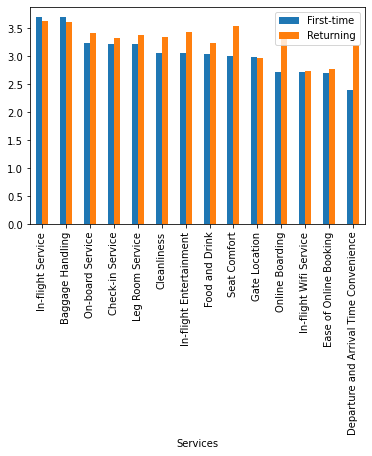

In [ ]:
temp_df.plot(x='Services',y=['First-time','Returning'],kind='bar')

In [ ]:
df.groupby('Customer Type')['Departure Delay'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Type,,,,,,,,
First-time,23780.0,15.024054,37.482967,0.0,0.0,0.0,13.0,921.0
Returning,106100.0,14.644156,38.201536,0.0,0.0,0.0,12.0,1592.0


In [ ]:
df.groupby('Customer Type')['Arrival Delay'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Type,,,,,,,,
First-time,23714.0,15.475415,38.074145,0.0,0.0,0.0,14.0,924.0
Returning,105773.0,15.004973,38.552532,0.0,0.0,0.0,13.0,1584.0


In [ ]:
df.groupby('Class')['Over All Satisfaction'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
Business,62160.0,3.432809,0.680657,1.071429,3.000000,3.500000,3.928571,5.000000
Economy,58309.0,3.066320,0.587095,1.071429,2.642857,3.071429,3.500000,4.857143
Economy Plus,9411.0,3.060066,0.618713,1.142857,2.642857,3.071429,3.500000,4.642857


Top 3 services most difference satisfaction score betweeen first time and returning customers:
1. Departure and Arrivial Time Convenience
1. Online Boarding
1. Seat Location

Top 3 Most satisfied services by first time customers:
1. In-flight Service
1. Baggage Handling	
1. On-board Service 

Top 3 Most satisfied services by returning customers:
1. In-flight Service	
1. Baggage Handling
1. Seat Comfort	

Top 3 Least satisfied services by first time customers:
1. Departure and Arrival Time Convenience
1. Ease of Online Booking
1. In-flight Wifi Service

Top 3 Least satisfied services by returning customers:
1. In-flight Wifi Service	
1. Ease of Online Booking	
1. Gate Location